# Visualização rápida dos dados do Strava

Danilo Lessa Bernardineli (danlessa@if.usp.br)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import os

In [2]:
filepath_ida = os.path.expanduser("~/data/explorations/strava/ida.csv")
filepath_volta = os.path.expanduser("~/data/explorations/strava/volta.csv")

In [3]:
data = pd.read_csv(filepath_volta, parse_dates=["When"])

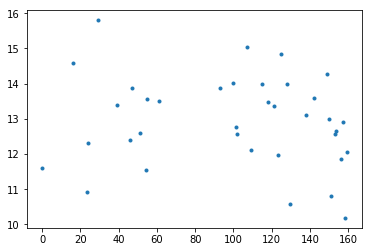

In [4]:
x = data["When"].astype(int)
x = (x - x.min()) / (1e9 * 60 * 60 * 24)

y = data["Elapsed Time"]
inds = (y < y.quantile(0.90))
x = x[inds]
y = y[inds]
y = y / 60
#y = (y - y.min()) / (y.max() - y.min())
plt.plot(x, y, '.')
plt.show()

In [5]:
st.linregress(x, y)

LinregressResult(slope=-0.003679726317025834, intercept=13.30245328712558, rvalue=-0.14079986367881828, pvalue=0.41274258239844264, stderr=0.0044373708381848865)

In [6]:
st.pearsonr(x, y)

(-0.1407998636788183, 0.4127425823984421)

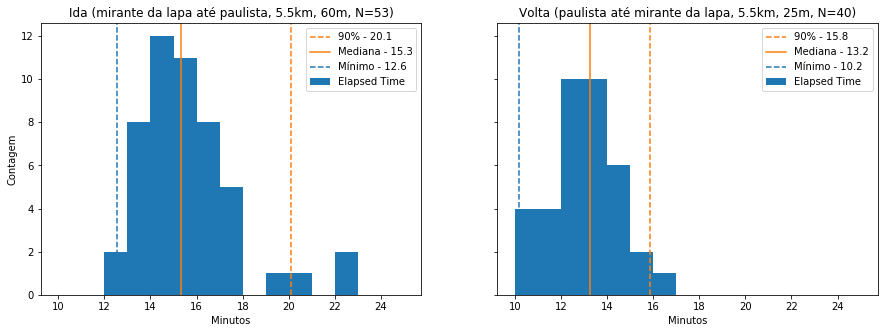

<Figure size 720x360 with 0 Axes>

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)

nbins = 15
range = (10, 25)

data = pd.read_csv(filepath_ida)
tempo = data["Elapsed Time"] / 60
upper = np.percentile(tempo, 90)
median = np.percentile(tempo, 50)
lower = np.percentile(tempo, 0)

plt.figure(figsize=(10, 5))
ax1.set_title("Ida (mirante da lapa até paulista, 5.5km, 60m, N={})".format(len(data)))
ax1.hist(tempo, bins=nbins, range=range)
ax1.set_ylabel("Contagem")

ax1.set_xlabel("Minutos")
ax1.axvline(upper, color="C1", linestyle="--", label="90% - {:.1f}".format(upper))
ax1.axvline(median, color="C1", label="Mediana - {:.1f}".format(median))
ax1.axvline(lower, color="C0", linestyle="--", label="Mínimo - {:.1f}".format(lower))
ax1.legend()

data = pd.read_csv(filepath_volta)
tempo = data["Elapsed Time"] / 60
upper = np.percentile(tempo, 90)
median = np.percentile(tempo, 50)
lower = np.percentile(tempo, 0)

ax2.set_title("Volta (paulista até mirante da lapa, 5.5km, 25m, N={})".format(len(data)))
ax2.hist(tempo, bins=nbins, range=range)
ax2.set_xlabel("Minutos")
ax2.axvline(upper, color="C1", linestyle="--", label="90% - {:.1f}".format(upper))
ax2.axvline(median, color="C1", label="Mediana - {:.1f}".format(median))
ax2.axvline(lower, color="C0", linestyle="--", label="Mínimo - {:.1f}".format(lower))
ax2.legend()
plt.show()

In [157]:
tempo.std()

44.37309640097845

In [158]:
tempo.median()

13.5